## Exercício 1:

a) $\pi$ **via Monte Carlo (etapa 1)**: Considere um círculo de raio $r=1$ inscrito em um quadrado de lado $2r=2$. A área do círculo é $\pi r^2 = \pi$. A área do quadrado é $4$. A razão entre a área do círculo e a área do quadrado é $\pi/4$. Se gerarmos $N$ pontos aleatórios uniformemente distribuídos no quadrado, a fração de pontos que cairão dentro do círculo será $\pi/4$. Assim, podemos estimar $\pi$ como $4$ vezes a fração de pontos que caíram dentro do círculo. Como visto em aula, pode considerar o círculo e quadrados completos, ou apenas o primeiro quadrante. Varie o número de pontos sorteados $N$ para ver como o resultado muda. Implemente na forma de uma função com assinatura:

```python
def pi_monte_carlo(N):
    '''
    DOCSTRING
    '''
    # seu código aqui
    return estimativa_pi
```
b) (Intermediário) A função `pi_monteCarlo(n1)` deve também receber um booleano `return_points` que indica se a função deve retornar os pontos sorteados separados em duas listas: `p_in` e `p_out`. Usando estas listas, faça um gráfico dos pontos sorteados, com os pontos dentro do círculo em azul e os pontos fora em vermelho. 

c) (Avançado) Seja $E_N = |\pi-\pi_N|/\pi$ o erro relativo da estimativa de $\pi$ com $N$ pontos. Faça gráficos de $E_N$ em função de $N$ para $N = 10^1, 10^2, 10^3, 10^4, 10^5, 10^6$. Compare os gráficos feitos em escala linear (`plt.plot`), log-log (`plt.loglog`), e semi-logs (`plt.semilogx` ou `plt.semilogy`). O que você observa? Faça um ajuste dos dados com uma função apropriada usando `numpy.polyfit` ou `scipy.optimize.curve_fit`.







The estimated value of pi is 3.1418, and the true value of pi is 3.141592653589793


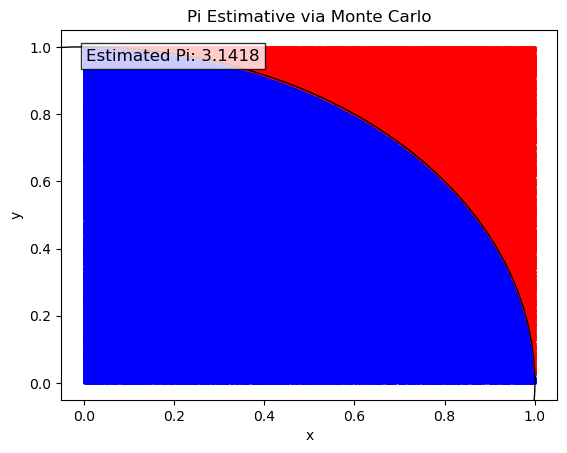

In [18]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.default_rng()

def pi_monteCarlo (n1, return_points = False):

  '''
  This function aims to estimate the value of pi using Monte Carlo Gaming Thoery

  Args:
  n1 = Used to generate 10^n numbers for x and for y

  Returns:
  Estimative of pi.
  '''

  x = rng.random(10**n1)
  y = rng.random(10**n1)

  r = np.sqrt((x**2)+(y**2))

  bool_arr = r <= 1

  p_in = r[bool_arr]
  p_out = r[~bool_arr]

  est_pi = 4*(len(p_in)/len(r))

  if return_points:
    fig, ax = plt.subplots()
    
    ax.scatter(x[bool_arr], y[bool_arr], color = 'Blue', s= 0.5, label = 'Inside')
    ax.scatter(x[~bool_arr], y[~bool_arr], color = 'Red', s = 0.5, label = 'Outside')
    
    circle = plt.Circle((0,0), 1, color = 'Black', fill = False)
    ax.add_artist(circle)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Pi Estimative via Monte Carlo')

    pi_text = f'Estimated Pi: {est_pi}'
    ax.text(0.05, 0.95, pi_text, transform = ax.transAxes, fontsize = 12, verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.8))

    return est_pi, p_in, p_out
  else:
    return est_pi, p_in, p_out

n1 = int(input('Please input the value of n. This will generate 10^n pairs of coordinates, and it will be used to estimate Pi: \n'))
return_points = input('Do you wish to plot the graph that shows which points fell inside/outside the circle? \n')

est_pi, p_in, p_out = pi_monteCarlo(n1, return_points)


print(f'The estimated value of pi is {est_pi}, and the true value of pi is {np.pi}')



## Exercício 2: Mapa logístico, caos e fractais (etapa 1)
 O mapa logístico é definido pela equação $$x_{n+1} = r x_n (1 - x_n),$$ onde $x_n$ é a população (normalizada entre 0 e 1) no instante de tempo discreto $n$, e $r$ é o parâmetro de crescimento. Para um dado valor de $r$, a população $x_n$ pode convergir para um valor fixo, oscilar entre dois valores, ou oscilar entre mais de dois valores, ou simplesmente enlouquecer e parecer aleatório. 

a) Implemente uma função `mapa_logistico(r, x0, N)` que recebe o parâmetro de crescimento `r`, a condição inicial `x0` (i.e. $x_0$ para $n=0$), e o número de iterações `N`, e retorna uma lista com os valores de $x_n$ para $n=0,1,2,\ldots,N$. 

b) Faça gráficos de $x_n$ vs $n$ (de 0 a 1000 pelo menos) para $r = 2, 3.3, 3.5, 3.9$, sempre iniciando de $x_0=1/2$. Talvez seja melhor usar um gráfico de linhas (`plt.plot`) para $r=2$, e um gráfico de pontos (`plt.scatter`) para os outros valores de $r$. O que você observa?

In [7]:
import numpy as np
import matplotlib.pyplot as plt

val = []

r1, x1, n1 = input('Enter the growing value r, the initial value x and the number of iterations n: ').split()
r1, x1 = float(r1), float(x1)
n1 = int(n1)

def logistic_map(r, x, n):
    for i in range(n):
        x = r*x*(1-x)
        val.append(x)
    return val  

logistic_map(r1, x1, n1)

print(val)

    

[0.75, 0.5625, 0.73828125, 0.5796661376953125, 0.7309599195141345, 0.5899725467340735, 0.7257148225025549, 0.5971584567079203, 0.7216807028704055, 0.6025729979246489]
